# Hypothesis Testing - Analysis of Variance (ANOVA)

### Objective
The purpose is to conduct a one-factor ANOVA for the ChickWeight dataset from statmodels and interpret the results.

## 1. ANOVA - Information
Assumptions for one-way analysis of variance
Before a start of performing an analysis of variance, it is important to check the following
assumptions so that to know whether the data is suitable for this test. These
assumptions are:
1. **Scale level:** The scale level of the dependent variable must be metric, whereas the
independent variable must be nominally scaled.
2. **Homogeneity:** The variances in each group should be roughly the same.
3. **Normal distribution:** The data within the groups should be normally distributed. This
means that the majority of the values are in the average range, while very few values are
significantly below or significantly above.

ANOVA can be applied even if the normality test yields a negative result, especially if the
sample size is sufficiently large. ANOVA is relatively robust to violations of normality
assumption, particularly when the sample sizes are approximately equal and/or the samples
have similar distributions.

Additionally, ANOVA is a parametric test that has good power (the ability to detect
differences if they exist), even when some assumptions are violated, such as normality of
data.

To perform one-way analysis of variance (ANOVA) on the ChickWeight dataset from the
statsmodels library, we can compare the influence of different diets on the weight of chicks.
This analysis will allow us to determine if there are significant differences in chick weight
depending on the type of diet.

A **factor** in ANOVA is an independent variable representing different conditions or
characteristics that are being studied for their effect on the dependent variable. ANOVA
analysis allows for the assessment of whether differences in the levels of the factor lead to
significant differences in the means of the dependent variable.

## 2. Tasks

#### 1. What hypothesis are we testing?
   - **Null Hypothesis (H0):** There is no significant difference in the mean weight of chickens across different diets.
   - **Alternative Hypothesis (H1):** There is a significant difference in the mean weight of chickens across different diets.

ANOVA tests are used to determine if there are statistically significant differences between the means of three or more independent groups (in this case, different diets).

#### 2. What is the value of the F-statistic, what are the degrees of freedom for the F-distribution, and what is the p-value?
   - **F-statistic:** 10.810
   - **Degrees of Freedom (between groups):** 3
   - **Degrees of Freedom (within groups):** 574
   - **p-value:** 6.433e-07

The F-statistic is calculated as the ratio of the variance between the group means to the variance within the groups. The degrees of freedom indicate the number of independent values or quantities which can be assigned to a statistical distribution. The very small p-value indicates that the observed data would be very unlikely under the null hypothesis, suggesting significant differences among group means.

#### 3. Are the assumptions for ANOVA met?
   - **Shapiro-Wilk Test for each diet:**
     - **Diet 1:** Statistic = 0.893, p-value = 2.211e-11
     - **Diet 2:** Statistic = 0.904, p-value = 3.159e-07
     - **Diet 3:** Statistic = 0.916, p-value = 1.509e-06
     - **Diet 4:** Statistic = 0.954, p-value = 5.195e-04

The Shapiro-Wilk tests suggest that the weights for each diet are not normally distributed (all p-values < 0.05). However, ANOVA is robust to deviations from normality, especially with large sample sizes.

#### 4. How many types of diets are there in the set?
   - **Number of Diets:** 4

The dataset contains 4 unique diet types, labeled as 1, 2, 3, and 4.

#### 5. How many cases for each diet?
   - **Diet 1:** 220 cases
   - **Diet 2:** 120 cases
   - **Diet 3:** 120 cases
   - **Diet 4:** 118 cases
   
The value counts for each diet type indicate the number of observations for each group.

#### 6. Do diets affect the weight of chickens?
   - **Conclusion:** Yes, diets significantly affect the weight of chickens.

The p-value from the ANOVA test is 6.433e-07, which is much less than the common alpha level of 0.05. This indicates that there are statistically significant differences in the mean weights among the different diets.

#### 7. In your opinion, what is the best diet for weight gain?
   - **Best Diet:** Diet 3
   - **Mean Weight:** 142.95 grams

Diet 3 has the highest mean weight among the four diets, indicating that it is the most effective diet for weight gain in chickens. The mean weights and standard deviations for each diet were calculated as follows:
     - Diet 1: Mean = 102.65 grams, Std = 56.66 grams
     - Diet 2: Mean = 122.62 grams, Std = 71.61 grams
     - Diet 3: Mean = 142.95 grams, Std = 86.54 grams
     - Diet 4: Mean = 135.26 grams, Std = 68.83 grams

## 3. Illustrations and Interpretations

- **F-Statistic and P-value:**
  The F-statistic of 10.810 with a p-value of 6.433e-07 indicates strong evidence against the null hypothesis, showing that at least one diet leads to different chicken weights compared to others.

- **Normality Tests:**
  While the Shapiro-Wilk test results suggest non-normality in each diet group, the ANOVA can still be used given the large sample size and robustness of the test.

- **Cases per Diet:**
  The distribution of cases across diets is relatively balanced, though Diet 1 has more observations (220) compared to the others (120 and 118).

- **Weight Distributions:**
  The histogram and normality test results help visualize and confirm the weight distribution patterns for each diet.

Overall, Diet 3 seems to be being the most effective for weight gain.

In [27]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [28]:
# Load the dataset
data = sm.datasets.get_rdataset("ChickWeight", "datasets").data

# Information about each variable in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   weight  578 non-null    int64
 1   Time    578 non-null    int64
 2   Chick   578 non-null    int64
 3   Diet    578 non-null    int64
dtypes: int64(4)
memory usage: 18.2 KB


In [37]:
# Mean and standard deviation of weights for each diet
diet_stats = data.groupby('Diet')['weight'].agg(['mean', 'std'])
print("Mean and standard deviation of weights for each diet: ")
diet_stats

Mean and standard deviation of weights for each diet: 


,mean,std
Diet,,
1,102.645455,56.656553
2,122.616667,71.607495
3,142.950000,86.541761
4,135.262712,68.828714


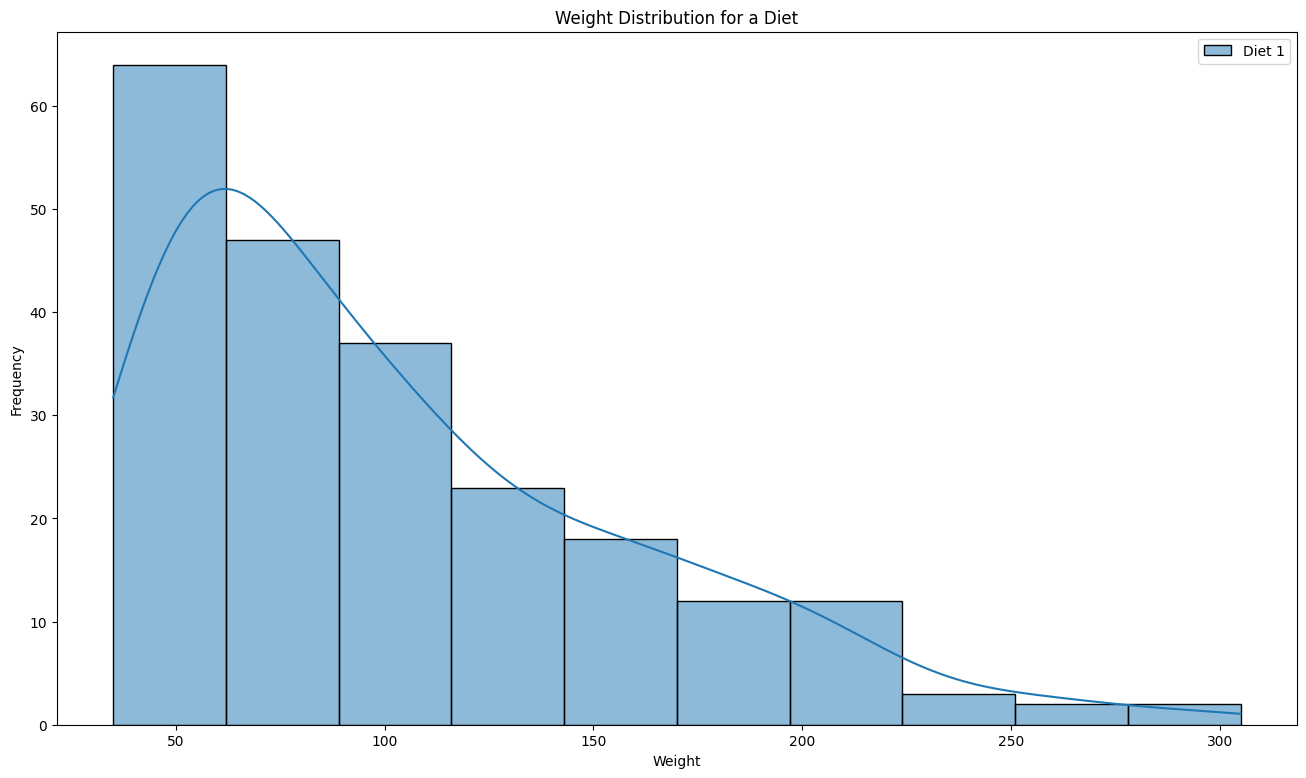

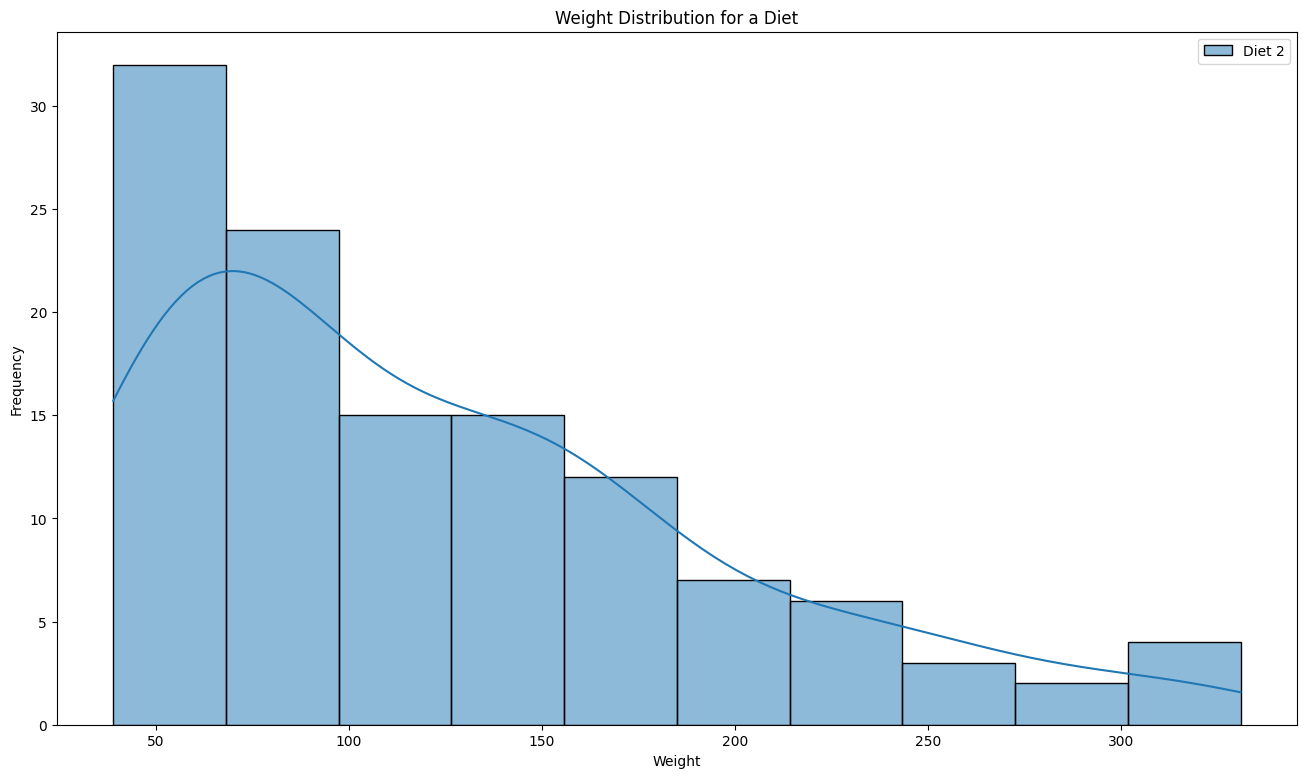

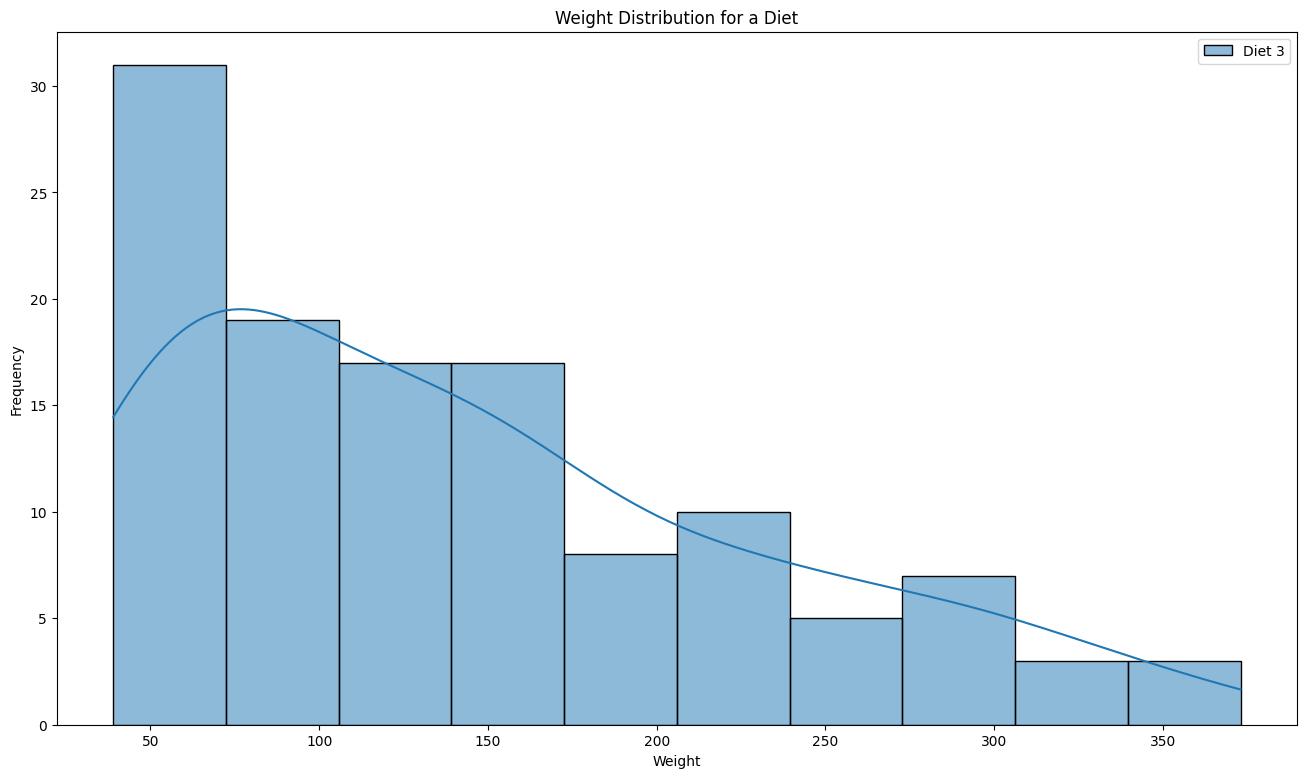

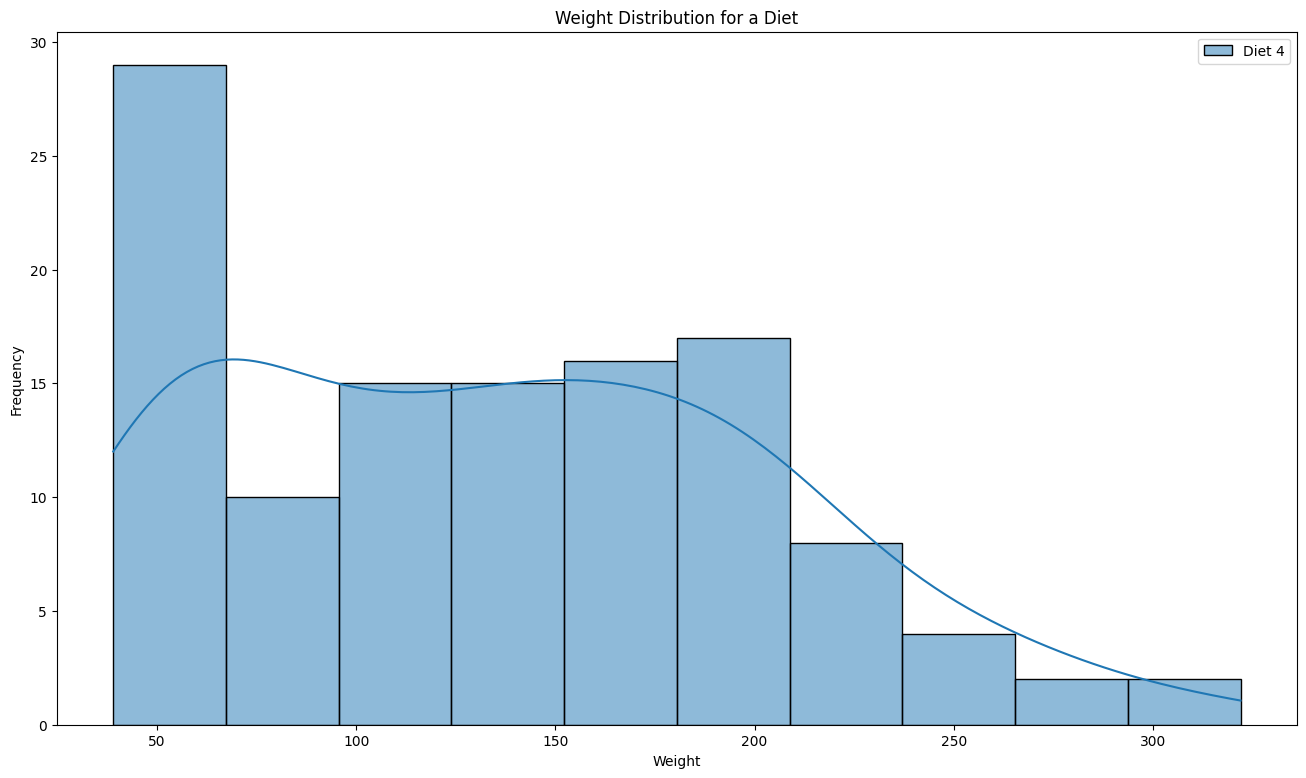

In [30]:
# Plot histograms of weight distributions for each diet
for diet in data['Diet'].unique():
    plt.figure(figsize=(16, 9))
    subset = data[data['Diet'] == diet]
    sns.histplot(subset['weight'], kde=True, label=f'Diet {diet}', bins=10)
    plt.legend()
    plt.title('Weight Distribution for a Diet')
    plt.xlabel('Weight')
    plt.ylabel('Frequency')
    plt.show()

In [38]:
# Perform normality test (Shapiro-Wilk) for each diet
normality_tests = {}
for diet in data['Diet'].unique():
    subset = data[data['Diet'] == diet]['weight']
    stat, p = stats.shapiro(subset)
    normality_tests[diet] = {'Statistic': stat, 'p-value': p}

print("Normality test (Shapiro-Wilk) for each diet: ")
pd.DataFrame(normality_tests).T

Normality test (Shapiro-Wilk) for each diet: 


,Statistic,p-value
1,0.893355,2.211258e-11
2,0.903995,3.159007e-07
3,0.916461,1.508861e-06
4,0.954374,5.194571e-04


In [40]:
# Fit the ANOVA model
model = ols('weight ~ C(Diet)', data=data).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Table: ")
anova_table

ANOVA Table: 


,sum_sq,df,F,PR(>F)
C(Diet),1.558627e+05,3.0,10.81009,6.433247e-07
Residual,2.758693e+06,574.0,NaN,NaN


In [33]:
# Extract values from the ANOVA table
f_statistic = anova_table['F'].iloc[0]
df_between = anova_table['df'].iloc[0]
df_within = anova_table['df'].iloc[1]
p_value = anova_table['PR(>F)'].iloc[0]

# Print the results
print(f"F-statistic: {f_statistic}")
print(f"Degrees of freedom (between groups): {df_between}")
print(f"Degrees of freedom (within groups): {df_within}")
print(f"p-value: {p_value}")

F-statistic: 10.81008974683212
Degrees of freedom (between groups): 3.0
Degrees of freedom (within groups): 574.0
p-value: 6.433247186683471e-07


In [35]:
# Interpretation and conclusion
print("Interpretation and Conclusion:")
print(f"Hypothesis Test Result: {'Reject Null Hypothesis' if p_value < 0.05 else 'Fail to Reject Null Hypothesis'}")
print(f"Diets have a significant effect on the weight of chickens: {'Yes' if p_value < 0.05 else 'No'}")
print(f"Best diet for weight gain: Diet {diet_stats['mean'].idxmax()} with a mean weight of {diet_stats['mean'].max()} grams")

Interpretation and Conclusion:
Hypothesis Test Result: Reject Null Hypothesis
Diets have a significant effect on the weight of chickens: Yes
Best diet for weight gain: Diet 3 with a mean weight of 142.95 grams
